In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='http://bit.ly/drinksbycountry'

In [3]:
pd.read_table(url)

,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"


In [4]:
pd.read_table(url,sep=',')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [11]:
data=pd.read_csv("C:/Users/vaio/Downloads/beer-servings.csv")
data

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [24]:
#data.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB


In [15]:
data.isna().sum()

Unnamed: 0                      0
country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [18]:
#data.isnull().sum()

## Filling Misssing Values

In [19]:
data.dtypes

Unnamed: 0                        int64
country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [28]:
num_cols=data[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']]

In [26]:
from sklearn.impute import SimpleImputer

In [29]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(num_cols)
num_cols=imputer.transform(num_cols)

In [33]:
num_cols=pd.DataFrame(num_cols,columns=[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']])

In [35]:
type(num_cols)

pandas.core.frame.DataFrame

In [36]:
data.drop(['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol'],axis=1,inplace=True)

In [37]:
data.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [39]:
data=pd.concat([num_cols,data],axis=1)

In [40]:
data.head()

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country,continent
0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,Albania,Europe
2,25.0,0.0,14.0,0.7,Algeria,Africa
3,245.0,138.0,312.0,12.4,Andorra,Europe
4,217.0,57.0,45.0,5.9,Angola,Africa


In [41]:
data.isna().sum()

(beer_servings,)                   0
(spirit_servings,)                 0
(wine_servings,)                   0
(total_litres_of_pure_alcohol,)    0
country                            0
continent                          0
dtype: int64

In [42]:
data=pd.read_csv("C:/Users/vaio/Downloads/beer-servings.csv",index_col='Unnamed: 0')
data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,NaN,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa


In [43]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [44]:
# Method 2

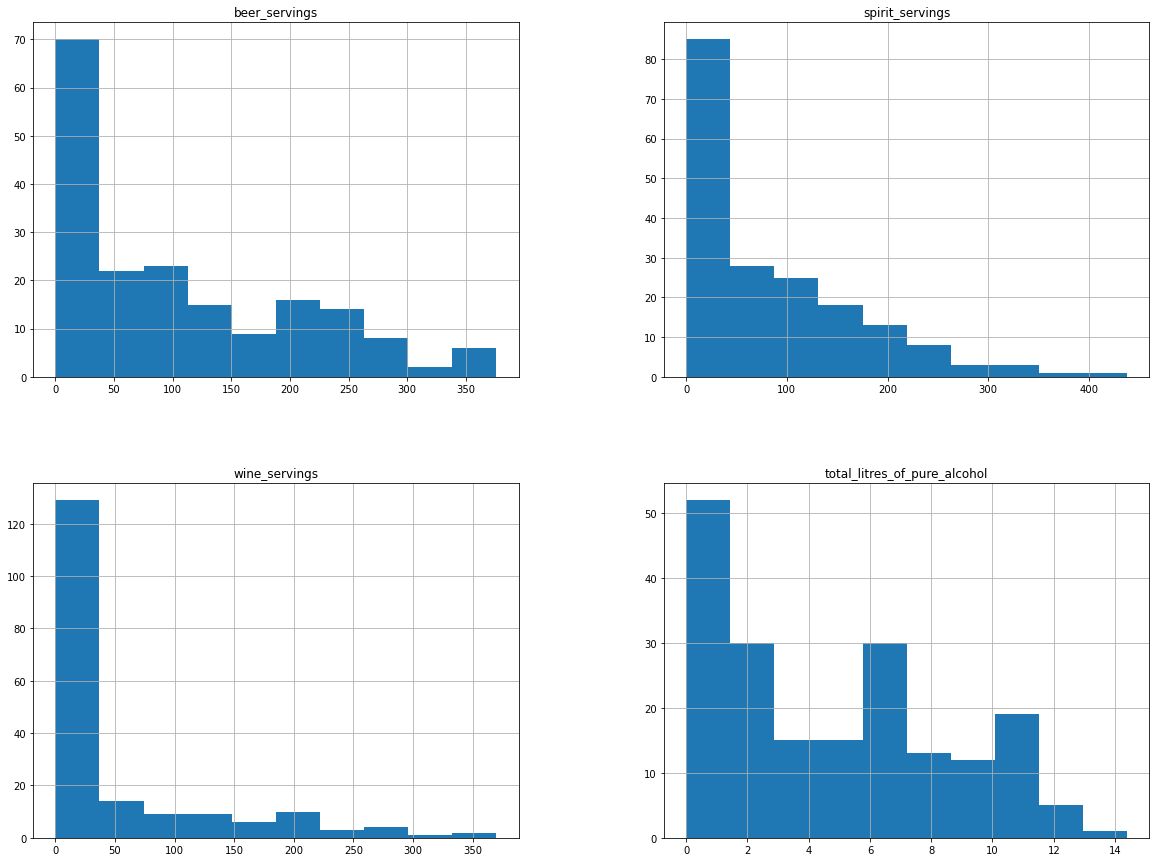

In [45]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [46]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [47]:
data['beer_servings']=data['beer_servings'].fillna(data['beer_servings'].median())

In [48]:
data['beer_servings'].isna().sum()

0

In [52]:
for i in['spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']:
         data[i]=data[i].fillna(data[i].median())

In [53]:
data.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

## Managing Outliers

Text(0.5, 1.0, 'Boxplot of beer servings')

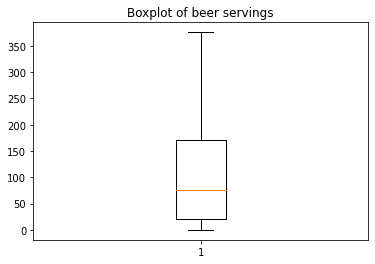

In [55]:
plt.boxplot(data['beer_servings'])
plt.title('Boxplot of beer servings')

Text(0.5, 1.0, 'Boxplot of spirit_servings')

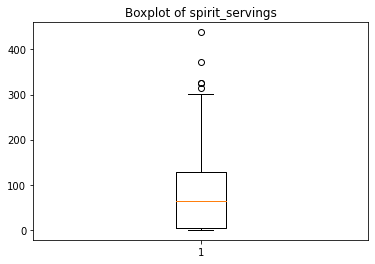

In [56]:
plt.boxplot(data['spirit_servings'])
plt.title('Boxplot of spirit_servings')

In [57]:
Q1=np.percentile(data['spirit_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['spirit_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['spirit_servings'],75,interpolation='midpoint')

In [58]:
print(Q1)
print(Q2)
print(Q3)

5.0
65.0
128.0


In [59]:
data['spirit_servings'].median()

65.0

In [60]:
IQR=Q3-Q1

In [61]:
print(IQR)

123.0


In [62]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [63]:
print(low_lim)
print(up_lim)

-179.5
312.5


In [64]:
outlier=[]
for x in data['spirit_servings']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [65]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [66]:
ind=data['spirit_servings']>up_lim

In [67]:
ind

0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: spirit_servings, Length: 193, dtype: bool

In [69]:
data.loc[ind].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [70]:
data.drop([15, 68, 73, 141, 144],inplace=True)

In [71]:
data.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
5,Antigua & Barbuda,102.0,128.0,45.0,4.9,North America
6,Argentina,76.0,25.0,221.0,8.3,South America
7,Armenia,21.0,179.0,11.0,3.8,Europe
8,Australia,261.0,72.0,212.0,10.4,Oceania
9,Austria,279.0,75.0,191.0,9.7,Europe


Text(0.5, 1.0, 'Boxplot of wine_servings')

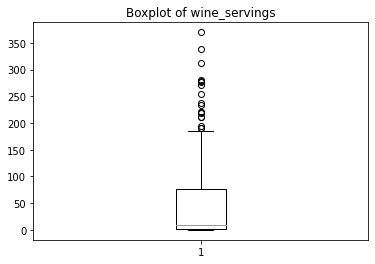

In [72]:
plt.boxplot(data['wine_servings'])
plt.title('Boxplot of wine_servings')

In [76]:
q1=np.percentile(data['wine_servings'],25,interpolation='midpoint')
q2=np.percentile(data['wine_servings'],50,interpolation='midpoint')
q3=np.percentile(data['wine_servings'],75,interpolation='midpoint')

In [77]:
print(q1)
print(q2)
print(q3)

1.0
9.0
76.0


In [75]:
data['wine_servings'].median()

9.0

In [78]:
iqr=q3-q1
print(iqr)

75.0


In [79]:
low_limit=q1-1.5*iqr
upp_limit=q3+1.5*iqr
print(low_limit)
print(upp_limit)

-111.5
188.5


In [80]:
ol=[]
for y in data['wine_servings']:
    if((y>upp_limit) or (y<low_limit)):
        ol.append(y)

In [81]:
ol

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 254.0,
 278.0,
 233.0,
 370.0,
 218.0,
 237.0,
 271.0,
 190.0,
 339.0,
 276.0,
 280.0,
 195.0,
 220.0]

Text(0.5, 1.0, 'Boxplot of total_litres_of_pure_alcohol')

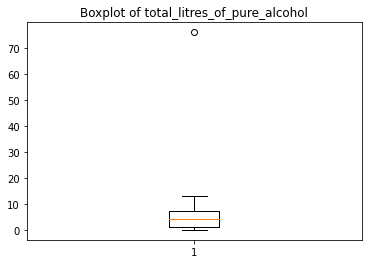

In [82]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('Boxplot of total_litres_of_pure_alcohol')

In [83]:
Q_1=np.percentile(data['total_litres_of_pure_alcohol'],25,interpolation='midpoint')
Q_2=np.percentile(data['total_litres_of_pure_alcohol'],50,interpolation='midpoint')
Q_3=np.percentile(data['total_litres_of_pure_alcohol'],75,interpolation='midpoint')

In [84]:
print(Q_1)
print(Q_2)
print(Q_3)

1.25
4.2
7.15


In [85]:
Iqr=Q_3-Q_1
print(Iqr)

5.9


In [87]:
lwl=Q_1-1.5*Iqr
ul=Q_3+1.5*Iqr
print(lwl)
print(ul)

-7.600000000000001
16.0


In [88]:
outl=[]
for z in data['total_litres_of_pure_alcohol']:
    if((z>ul) or (z<lwl)):
        outl.append(z)

In [89]:
outl

[76.0]